      Player Name  Ranking  Year  College Year Team    TS%   eFG%  Total S %  \
0  Brandon Clarke        4  2020          2019   GU  0.699  0.693      164.8   
1     Buddy Hield        4  2017          2016   OU  0.665  0.623      183.7   
2   Elfrid Payton        4  2015          2014   LA  0.551  0.524      137.7   
3       Ja Morant        1  2020          2019  MSU  0.612  0.553      167.5   
4   Keegan Murray        5  2023          2022   UI  0.638  0.614      169.9   

   ORB%  DRB%  ...  STL%  BLK%  USG%  PPR  PPS   ORtg   DRtg  eDiff    FIC  \
0  13.9  19.7  ...   2.3  11.0  23.9 -1.0  1.7  138.1   83.8   54.4  683.4   
1   4.0  13.0  ...   1.8   1.4  30.2 -4.7  1.5  124.1  100.7   23.4  553.8   
2   7.1  11.8  ...   3.6   1.7  27.7  0.9  1.4  113.7  101.4   12.2  527.5   
3   3.9  12.7  ...   2.7   2.3  33.3  4.1  1.5  119.5   95.1   24.4  680.8   
4   9.8  20.1  ...   2.3   6.3  29.6 -0.4  1.5  135.1   96.0   39.0  681.0   

    PER  
0  34.6  
1  26.7  
2  23.6  
3  29.9  


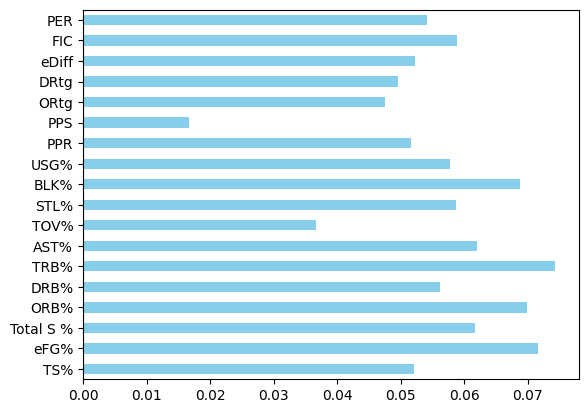

Model Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       6.0
           3       0.00      0.00      0.00       2.0
           4       0.00      0.00      0.00       2.0
           5       0.00      0.00      0.00       2.0

    accuracy                           0.00      17.0
   macro avg       0.00      0.00      0.00      17.0
weighted avg       0.00      0.00      0.00      17.0



In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv(r'C:\Users\abmir\Desktop\nba_ROTY_predictor\data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# print(data['Ranking'].value_counts())

# Select features (X) and target variable (y)
# In this case, let's use all columns except 'Player Name', 'Ranking', and 'Year' as features
X = data.drop(['Player Name', 'Ranking', 'Year','College Year','Team'], axis=1)
y = data['Ranking']

# Split the data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a RandomForestClassifier for multi-class classification
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

print(feature_importances)

transpose_fi = feature_importances.T

#making histogram for feature importances
transpose_fi.plot(kind='barh', legend=False, color='skyblue')
plt.show()

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the accuracy and other metrics of the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

# Additional classification metrics
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(classification_report(y_test, predictions))
